### 1. Pesquise e descreva com suas palavras, resumidamente, cada uma das 7 camadas da internet:
- Física: O meio utilizado para o transporte de dados, como cabos de fibra óptica, cobre ou wifi.
- Ligação: A camada que controla o transporte de dados em uma conexão física já estabelecida, como o protocolo Ethernet e os endereços MAC.
- Rede: Determina os caminhos em uma conexão entre vários computadores. Enquadra conceitos como roteadores, endereços IP e IPV6.
- Transporte: Garante a integridade dos dados transmitidos, como protocolos TCP e UDP.
- Sessão: Controla as sessões (início e fim) durante uma conexão, garantindo a sincronização entre os dois pontos conectados.
- Apresentação: Se preocupa com a codificação utilizada para apresentar dados, como HTML,HSON, CSV, JPEG, etc...
- Aplicação: Padronização da aplicação responsável pela apresentação dos dados, como HTTPs em navegadores, ou POP3 e SMTP em emails. 

### 2. Pesquise e descreva com suas palavras, resumidamente, cada um dos principais métodos HTTP:
- GET: Solicitação para receber dados do servidor, independente do formato (JSON, XML, HTML, etc..)
- POST: Enviar (Criar) dados para o servidor.
- PUT: Atualiza dados existentes no servidor.
- PATCH: Atualiza dados parcialmente, como atualizar apenas um dos campos em um ID de uma tabela.
- DELETE: Exclui os dados desejados no servidor.
- HEAD: Retorna metadados sobre o recurso de uma URL
- OPTIONS: Retorna uma lista de quais métodos HTTP são suportados ou permitidos pelo servidor para aquela URL.

### 3. Pesquise e explique com suas palavras, resumidamente, o que é uma API:
- API é uma forma de comunicação, que determina um conjunto de padrões e protocolos para que dois aplicativos consigam enviar e receber dados entre si, sem que haja necessidade de se conhecer a forma de construção/implementação um do outro.

### 4. Execute o `requests.post` para preencher todos os campos do formulário que consta na URL https://httpbin.org/forms/post como se você estivesse realmente pedindo uma pizza, com suas próprias preferências, nome, email de aluno do Infnet e um telefone que pode ser falso, e imprima o retorno do site.

In [2]:
import requests

url = "https://httpbin.org/forms/post"
resposta_get = requests.get(url)
resposta_get.text.split("\n")

['<!DOCTYPE html>',
 '<html>',
 '  <head>',
 '  </head>',
 '  <body>',
 "  <!-- Example form from HTML5 spec http://www.w3.org/TR/html5/forms.html#writing-a-form's-user-interface -->",
 '  <form method="post" action="/post">',
 '   <p><label>Customer name: <input name="custname"></label></p>',
 '   <p><label>Telephone: <input type=tel name="custtel"></label></p>',
 '   <p><label>E-mail address: <input type=email name="custemail"></label></p>',
 '   <fieldset>',
 '    <legend> Pizza Size </legend>',
 '    <p><label> <input type=radio name=size value="small"> Small </label></p>',
 '    <p><label> <input type=radio name=size value="medium"> Medium </label></p>',
 '    <p><label> <input type=radio name=size value="large"> Large </label></p>',
 '   </fieldset>',
 '   <fieldset>',
 '    <legend> Pizza Toppings </legend>',
 '    <p><label> <input type=checkbox name="topping" value="bacon"> Bacon </label></p>',
 '    <p><label> <input type=checkbox name="topping" value="cheese"> Extra Cheese <

In [44]:
resposta_options = requests.options(url)
resposta_options.headers

{'Date': 'Thu, 29 Aug 2024 01:19:07 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Allow': 'OPTIONS, HEAD, GET', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Methods': 'GET, POST, PUT, DELETE, PATCH, OPTIONS', 'Access-Control-Max-Age': '3600'}

In [9]:
url = 'https://httpbin.org/post'
url_form = 'https://httpbin.org/forms/post'

dados = {"form": {
    "comments": "Esse é um teste", 
    "custemail": "rodrigo@gmail.com", 
    "custname": "RodrigoMesquita", 
    "custtel": "99835927", 
    "delivery": "16:30", 
    "size": "large", 
    "topping": [
      "bacon", 
      "cheese"
    ]
  }}


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36 Edg/128.0.0.0",
    'referer': url_form
}

resp = requests.post(url, data=dados, headers={'referer': url_form})

print(resp.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "form": [
      "comments", 
      "custemail", 
      "custname", 
      "custtel", 
      "delivery", 
      "size", 
      "topping"
    ]
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "92", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "Referer": "https://httpbin.org/forms/post", 
    "User-Agent": "python-requests/2.32.3", 
    "X-Amzn-Trace-Id": "Root=1-66d9055b-7f1db04e1f76ddde5c3fae11"
  }, 
  "json": null, 
  "origin": "135.237.130.234", 
  "url": "https://httpbin.org/post"
}



### 5. Utilize a API "Dados Abertos da Câmara dos Deputados" (https://dadosabertos.camara.leg.br/swagger/api.html) para obter as informações de cada deputado, incluindo seus ids, armazenando em um dataframe do Pandas.

In [1]:
import requests
import pandas as pd

base_url = "https://dadosabertos.camara.leg.br/api/v2/deputados"
resposta = requests.get(base_url)

if resposta.status_code == 200:
    dados = resposta.json()
    df = pd.DataFrame(dados['dados'])
else:
    print(f'Erro na requisição: {resposta.status_code}')

df.head(5)

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


### 6. Para cada deputado (id) obtenha a informação de sua despesa total para o ano de 2023 e acrescente uma coluna no dataframe para carregar esse dado.

In [13]:
df_despesas = df.copy()
df_despesas['total_despesas'] = 0

for id in df['id']:
    try:
        url = f"https://dadosabertos.camara.leg.br/api/v2/deputados/{id}/despesas?ano=2023"
        resposta = requests.get(url)
        conteudo = resposta.json()
        dados = pd.DataFrame(conteudo['dados'])
        valor = float(dados['valorDocumento'].sum())
        df_despesas.loc[df_despesas['id'] == id, 'total_despesas'] = valor
    except:
        print(f'Erro ao obter despesas do deputado com id {id}')

df_despesas.head(5)
    

Erro ao obter despesas do deputado com id 74052
Erro ao obter despesas do deputado com id 229069
Erro ao obter despesas do deputado com id 229106
Erro ao obter despesas do deputado com id 228941
Erro ao obter despesas do deputado com id 227991
Erro ao obter despesas do deputado com id 212625
Erro ao obter despesas do deputado com id 228616
Erro ao obter despesas do deputado com id 229585
Erro ao obter despesas do deputado com id 220008
Erro ao obter despesas do deputado com id 68720
Erro ao obter despesas do deputado com id 229333
Erro ao obter despesas do deputado com id 228837
Erro ao obter despesas do deputado com id 228797
Erro ao obter despesas do deputado com id 122195
Erro ao obter despesas do deputado com id 229082
Erro ao obter despesas do deputado com id 229432
Erro ao obter despesas do deputado com id 229225
Erro ao obter despesas do deputado com id 229939
Erro ao obter despesas do deputado com id 227660
Erro ao obter despesas do deputado com id 74095
Erro ao obter despesas 

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email,total_despesas
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br,7221.73
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br,38578.92
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br,2770.20
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br,44779.52
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br,9853.06


In [15]:
df_resumo_despesas = df_despesas[['id','nome', 'siglaPartido', 'total_despesas']]
df_resumo_despesas

,id,nome,siglaPartido,total_despesas
0,220593,Abilio Brunini,PL,7221.73
1,204379,Acácio Favacho,MDB,38578.92
2,220714,Adail Filho,REPUBLICANOS,2770.20
3,221328,Adilson Barroso,PL,44779.52
4,204560,Adolfo Viana,PSDB,9853.06
...,...,...,...,...
508,220558,Zé Trovão,PL,4888.09
509,204517,Zé Vitor,PL,4945.53
510,160592,Zeca Dirceu,PT,31484.39
511,220592,Zezinho Barbary,PP,2593.78


### 7. Ordene o dataframe pela coluna das despesas totais de 2023 e mostre os 5 deputados que mais gastaram e os 5 que menos gastaram.

In [16]:
print('Deputados que mais gastaram')
df_resumo_despesas.sort_values(by='total_despesas', ascending=False).head(5)

Deputados que mais gastaram


,id,nome,siglaPartido,total_despesas
185,74454,Eunício Oliveira,MDB,426525.79
215,74383,Giacobo,PL,399579.50
226,204419,Glaustin da Fokus,PODE,332829.10
472,74356,Silas Câmara,REPUBLICANOS,292286.00
232,204408,Gustinho Ribeiro,REPUBLICANOS,261700.00


In [25]:
#Desconsiderei os deputados para os quais a API não retornou informações de despesas
print('Deputados que menos gastaram')
df_resumo_despesas[df_resumo_despesas['total_despesas'] > 0].sort_values(by='total_despesas', ascending=True).head(5)

Deputados que menos gastaram


,id,nome,siglaPartido,total_despesas
241,178884,Hildo Rocha,MDB,376.45
410,220685,Paulo Litro,PSD,970.06
203,191923,Flávio Nogueira,PT,1542.28
455,160629,Romero Rodrigues,PODE,1619.61
403,220627,Paulinho Freire,UNIÃO,1676.77


### 8. Estude a API "OpenWeatherMap" (https://openweathermap.org/api) e utilize-a para extrair informações de seu interesse a respeito da cidade em que você mora (se você conhecer outra API equivalente, pode utilizá-la sem problemas).


In [33]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()

api_key = os.getenv('API_WEATHER')

url = "https://api.openweathermap.org/data/2.5/weather"
lat = -22.904727451063593
lon = -43.273211464919804

params = {
    'lat': lat,
    'lon': lon,
    'appid': api_key,
    'units': 'metric'
}

resposta = requests.get(url, params=params)

if resposta.status_code == 200:
    dados = resposta.json()
else:
    print("Erro na requisição:", resposta.content)

local = dados['name']
desc = dados['weather'][0]['description']
temp = dados['main']['temp']
tmin = dados['main']['temp_min']
tmax = dados['main']['temp_max']

print(f'Faz {temp}°C em {local}, Rio de Janeiro - RJ, com temperatura mínima de {tmin}°C e máxima de {tmax}°C.')

Faz 23.82°C em São Cristóvão, Rio de Janeiro - RJ, com temperatura mínima de 23.81°C e máxima de 24.95°C.


### 9. Estude a API "CoinGecko" (https://www.coingecko.com/pt/api) e utilize-a para obter o último valor do Bitcoin em dólares (se você conhecer outra API equivalente, pode utilizá-la sem problemas).

In [24]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv('API_COIN')
url = "https://api.coingecko.com/api/v3/simple/price"

params = {
    'ids': 'bitcoin',
    'vs_currencies': 'usd',
    'x-cg-pro-api-key': api_key
}

resposta = requests.get(url, params=params)

if resposta.status_code == 200:
    dados = resposta.json()
else:
    print("Erro na requisição:", resposta.content)

bitcoin = float(dados['bitcoin']['usd'])

print(f"Bitcoin está cotada em ${bitcoin} dólares.")

Bitcoin está cotada em $57987.0 dólares.


### 10. Estude a API "Astronomy Picture of the Day" (APOD) da NASA (a primeira da lista em https://api.nasa.gov/), gere uma chave colocando seu gmail do Infnet e utilize no seu código para obter as informações da imagem do dia do seu aniversário de 2023.

In [13]:
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO
import requests

def apinasa(data):
    load_dotenv()

    api_key = os.getenv('API_NASA')
    url = "https://api.nasa.gov/planetary/apod"

    params = {
        'date': data,
        'api_key': api_key
    }

    resposta = requests.get(url, params=params)

    if resposta.status_code == 200:
        dados = resposta.json()
    else:
        print("Erro na requisição:", resposta.content)

    return dados['url']

img_url = apinasa('2023-04-12')

print(f"Acesse a imagem de 12-04-2023 em {img_url}")

Acesse a imagem de 12-04-2023 em https://apod.nasa.gov/apod/image/2304/Trottier_M31SW_APOD_Re1024.jpg


### 11. Estude a API "SendGrid" (https://app.sendgrid.com/), faça login com seu gmail do Infnet para obter uma chave, instale no seu ambiente virtual com 'pip install sendgrid' e rode o código em Python sugerido no site, enviando para si mesmo um email através dele (provavelmente vai cair na caixa de spam, sem problemas).

In [2]:
%pip install sendgrid

  Using cached sendgrid-6.11.0-py3-none-any.whl.metadata (11 kB)
  Using cached python_http_client-3.3.7-py3-none-any.whl.metadata (6.9 kB)
  Using cached starkbank_ecdsa-2.2.0-py3-none-any.whl
Using cached sendgrid-6.11.0-py3-none-any.whl (101 kB)
Using cached python_http_client-3.3.7-py3-none-any.whl (8.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
import os
from sendgrid import SendGridAPIClient
from sendgrid.helpers.mail import Mail

def email(mensagem):

    message = Mail(
        from_email='rodrigo.mesquita@al.infnet.edu.br',
        to_emails='rodrigo.mesquita@al.infnet.edu.br',
        subject='Dados solicitados no trabalho sobre APIs',
        html_content=f'{mensagem}')
    try:
        sg = SendGridAPIClient(os.getenv('SENDGRID_API_KEY'))
        response = sg.send(message)
        print(response.status_code)
        print(response.body)
        print(response.headers)
    except Exception as e:
        print(e)

email('testando')

202
b''
Server: nginx
Date: Wed, 04 Sep 2024 23:48:47 GMT
Content-Length: 0
Connection: close
X-Message-Id: pr6e5ZXNQbGg7jNAUNtoNw
Access-Control-Allow-Origin: https://sendgrid.api-docs.io
Access-Control-Allow-Methods: POST
Access-Control-Allow-Headers: Authorization, Content-Type, On-behalf-of, x-sg-elas-acl
Access-Control-Max-Age: 600
X-No-CORS-Reason: https://sendgrid.com/docs/Classroom/Basics/API/cors.html
Strict-Transport-Security: max-age=600; includeSubDomains




### 12. Utilizando a SendGrid, envie para você mesmo um email com um texto formatado contendo as informações do dia atual:
- Temperatura na sua cidade;
- Valor do Bitcoin; e
- Link e descrição da imagem do dia da NASA.

In [21]:
from datetime import datetime

dt_atual = datetime.now()
dt_format = dt_atual.strftime('%Y-%m-%d')
dt_atual_br = dt_atual.strftime('%d-%m-%Y')
img_url = apinasa(dt_format)
print(img_url)

https://apod.nasa.gov/apod/image/2409/Bat_Taivalnaa_960.jpg


In [35]:
mensagem = f"""
    <body>
        <strong>Dados solicitados no trabalho sobre APIs:</strong>
        <ul>
            <li><strong>Temperatura no Rio de Janeiro em {dt_atual_br}:</strong> {temp}°C</li>
            <li><strong>Cotação Bitcoin em {dt_atual_br}:</strong> ${bitcoin}</li>
            <li><strong>Imagem da Nasa em  {dt_atual_br}:</strong> {img_url}</li>
        </ul>
    </body>
    """
email(mensagem)

202
b''
Server: nginx
Date: Wed, 04 Sep 2024 23:52:46 GMT
Content-Length: 0
Connection: close
X-Message-Id: PmG_1fvHRQyubHyZAPOrlQ
Access-Control-Allow-Origin: https://sendgrid.api-docs.io
Access-Control-Allow-Methods: POST
Access-Control-Allow-Headers: Authorization, Content-Type, On-behalf-of, x-sg-elas-acl
Access-Control-Max-Age: 600
X-No-CORS-Reason: https://sendgrid.com/docs/Classroom/Basics/API/cors.html
Strict-Transport-Security: max-age=600; includeSubDomains




# Adicionei o print do email recebido

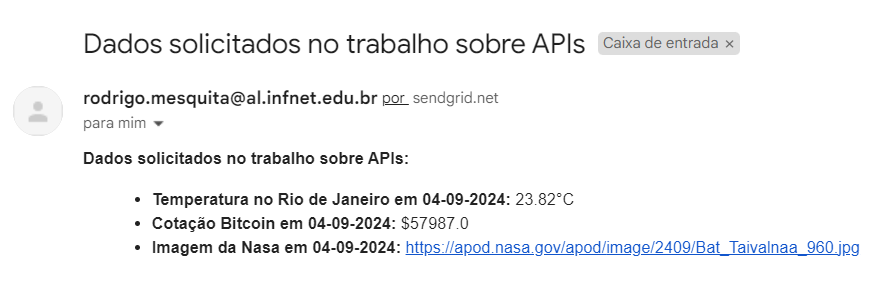